# Proyek Akhir : Klasifikasi Gambar
Muhamad Anwar Sanusi

In [1]:
# Setup
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# melakukan download file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-08 05:20:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.26MB/s    in 74s     

2021-05-08 05:21:53 (4.16 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakkukan ekstraksi pada file zip
import zipfile
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
#melihat struktur data yang telah kita download tadi
os.listdir('/tmp/rockpaperscissors')

['paper', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [5]:
rock = len(os.listdir('/tmp/rockpaperscissors/rock'))
print('Count of rock:', rock)

Count of rock: 726


In [6]:
scissors = len(os.listdir('/tmp/rockpaperscissors/scissors'))
print('Count of scissors:', scissors)

Count of scissors: 750


In [7]:
paper = len(os.listdir('/tmp/rockpaperscissors/paper'))
print('Count of paper:', paper)

Count of paper: 712


In [8]:
n = rock + paper + scissors
print('Total sample:', n)

Total sample: 2188


<BarContainer object of 3 artists>

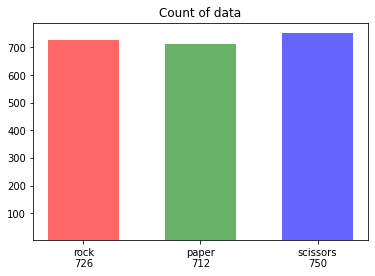

In [9]:
#visualisasi jumlah dataset
counts = [rock, paper, scissors]
groups = ['rock\n' + str(rock), 
          'paper\n' + str(paper),
          'scissors\n' + str(scissors)]
colors = ['r', 'g', 'b']
plt.title('Count of data')

width = len(counts) * 0.2
plt.bar(groups, counts, width=width, color=colors, alpha=0.6, bottom=2, linewidth=2)

In [10]:
# membuat nama directori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

# membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [11]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [12]:
# membagi direktori rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# membagi direktori paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# membagi direktori scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)


In [13]:
# membuat direktori rock pada direktori data training
train_rock = os.path.join(train_dir, 'rock')
# membuat direktori paper pada direktori data training
train_paper = os.path.join(train_dir, 'paper')
# membuat direktori scissor pada direktori data training
train_scissors = os.path.join(train_dir, 'scissors')

# membuat direktori rock pada direktori data validation
val_rock = os.path.join(validation_dir, 'rock')
# membuat direktori paper pada direktori data validation
val_paper = os.path.join(validation_dir, 'paper')
# membuat direktori scissor pada direktori data validation
val_scissors = os.path.join(validation_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [14]:
# mengcopy data train dan data val ke directory baru

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [15]:
len(os.listdir('/tmp/rockpaperscissors/train/rock'))

435

In [16]:
len(os.listdir('/tmp/rockpaperscissors/val/rock'))

291

In [17]:
len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

450

In [18]:
len(os.listdir('/tmp/rockpaperscissors/val/scissors'))

300

In [19]:
len(os.listdir('/tmp/rockpaperscissors/train/paper'))

427

In [20]:
len(os.listdir('/tmp/rockpaperscissors/val/paper'))

285

In [21]:
#cek ukuran data training
df_train_len = len(os.listdir('/tmp/rockpaperscissors/train/rock')) + len(os.listdir('/tmp/rockpaperscissors/train/scissors')) + len(os.listdir('/tmp/rockpaperscissors/train/paper'))
print('data training sebanyak ', df_train_len)

#check proporsi data validation (40% dari dataset)
df_val_len = len(os.listdir('/tmp/rockpaperscissors/val/rock')) + len(os.listdir('/tmp/rockpaperscissors/val/scissors')) + len(os.listdir('/tmp/rockpaperscissors/val/paper'))
print('data validation sebanyak ', df_val_len)

data training sebanyak  1312
data validation sebanyak  876


In [22]:
# membuat image data generator

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [23]:
#menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),#resolusi seluruh gambar diubah menjadi 150x150 piksel
    batch_size = 32,
    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [25]:
#membangun arsitektur sebuah model CNN
#fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar. 
#Sedangkan layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

#melihat summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [26]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [27]:
# latih model dengan model.fit 
model_latih = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 46s - loss: 1.1582 - accuracy: 0.3688 - val_loss: 1.0401 - val_accuracy: 0.4062
Epoch 2/20
25/25 - 45s - loss: 0.8294 - accuracy: 0.6438 - val_loss: 0.5373 - val_accuracy: 0.8125
Epoch 3/20
25/25 - 45s - loss: 0.4453 - accuracy: 0.8325 - val_loss: 0.2745 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 47s - loss: 0.2715 - accuracy: 0.8963 - val_loss: 0.2977 - val_accuracy: 0.8875
Epoch 5/20
25/25 - 45s - loss: 0.2722 - accuracy: 0.9162 - val_loss: 0.2746 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 45s - loss: 0.1908 - accuracy: 0.9362 - val_loss: 0.0944 - val_accuracy: 0.9688
Epoch 7/20
25/25 - 45s - loss: 0.1281 - accuracy: 0.9563 - val_loss: 0.1557 - val_accuracy: 0.9438
Epoch 8/20
25/25 - 45s - loss: 0.1567 - accuracy: 0.9588 - val_loss: 0.1426 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 45s - loss: 0.1520 - accuracy: 0.9563 - val_loss: 0.0655 - val_accuracy: 0.9937
Epoch 10/20
25/25 - 45s - loss: 0.1284 - accuracy: 0.9550 - val_loss: 0.1608 - val_accuracy: 0.9438
Epoch 11/

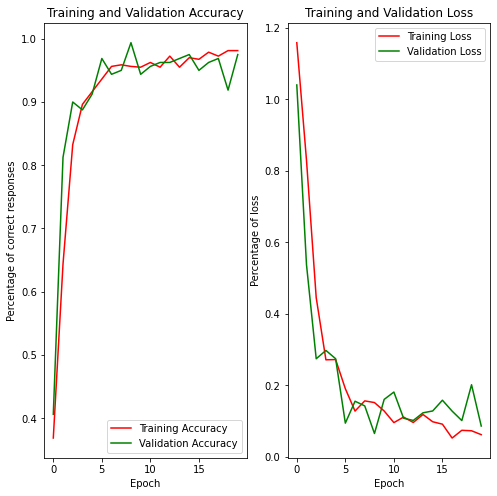

In [28]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = model_latih.history['accuracy']
val_acc = model_latih.history['val_accuracy']

loss = model_latih.history['loss']
val_loss = model_latih.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'g', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Percentage of correct responses')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'g', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Percentage of loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Berdasarkan grafik di atas dapat dilihat bahwa kurva training dan validation accuracy jaraknya tidak berjauhan dan pada epoch seterusnya semakin meningkat sehingga model ini tidak terjadi overfitting. Kemudian, nilai training dan validation loss juga semakin lama semakin turun sehingga model yang digunakan dapat dikatakan cukup baik.


In [42]:
len_val_data = len(validation_generator.filenames)
batch_size = 32

In [43]:
#Evaluasi model
validation_model = model.evaluate_generator(validation_generator, len_val_data // batch_size, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


27/27 [==============================] - 17s 612ms/step - loss: 0.1129 - accuracy: 0.9757


In [44]:
print('Percentage of correct responses: ' + str(int(validation_model[1] * 10000) / 100) + '%')

Percentage of correct responses: 97.56%


Saving Screen Shot 2021-05-08 at 13.17.47.png to Screen Shot 2021-05-08 at 13.17.47.png
Screen Shot 2021-05-08 at 13.17.47.png
paper


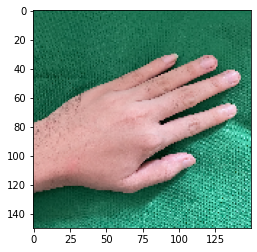

In [50]:

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    elif classes[0][2] == 1:
        print('scissors')